In [36]:
#import libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import plotly.express as px
import plotly.graph_objects as go





# Set display options
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # None means unlimited
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
def wrangle(filepath):
    # Read csv file into dataframe
    df = pd.read_csv(filepath)
    
    # Remove duplicated values
    df.drop_duplicates(subset="id", inplace=True)
    
    # Convert date to datetime and split
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day


    #convert zipcode to str
    df["zipcode"] = df["zipcode"].astype("category")
    
    # Drop date and id column
    df.drop(["date", "id"], axis=1, inplace=True)

    # Drop multicolinear variables
    df.drop(["sqft_above", "sqft_basement"], axis=1, inplace=True)

    #subset price where "price_aprox_usd" < 400_000
    # mask_price = df["price"] < 1_000_000

    # df = df[mask_price]
    
    
    # Add other data wrangling steps here if needed
    
    return df


In [5]:
df = wrangle(r"C:\Users\eakli\Downloads\task\ecole\house-pricing-prediction\apartment-hunter\data\raw\kc_house_data.csv")

In [6]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated zipcode      lat     long  \
0     0          3      7      1955             0   98178  47.5112 -122.257   
1     0          3      7      1951          1991   98125  47.7210 -122.319   
2     0          3      6      1933             0   98028  47.7379 -122.233   
3     0          5      7      1965             0   98136  47.5208 -122.393   
4     0          3      8      1987             0   98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  
0           1340        5650  2014     10   13  
1           1690        7639  2014     12    9  
2           2720        8062  2015      2   25  
3           1360        5000  2014     12    9  
4           1800        7503  2015      2   18

In [7]:
df.shape

(21436, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21436 non-null  float64 
 1   bedrooms       21436 non-null  int64   
 2   bathrooms      21436 non-null  float64 
 3   sqft_living    21436 non-null  int64   
 4   sqft_lot       21436 non-null  int64   
 5   floors         21436 non-null  float64 
 6   waterfront     21436 non-null  int64   
 7   view           21436 non-null  int64   
 8   condition      21436 non-null  int64   
 9   grade          21436 non-null  int64   
 10  yr_built       21436 non-null  int64   
 11  yr_renovated   21436 non-null  int64   
 12  zipcode        21436 non-null  category
 13  lat            21436 non-null  float64 
 14  long           21436 non-null  float64 
 15  sqft_living15  21436 non-null  int64   
 16  sqft_lot15     21436 non-null  int64   
 17  year           21436 non-null  int32

In [9]:
df["price"].describe().apply("{0:,.0f}".format)

count       21,436
mean       540,529
std        367,689
min         75,000
25%        322,150
50%        450,000
75%        645,000
max      7,700,000
Name: price, dtype: object

<Axes: xlabel='price', ylabel='Count'>

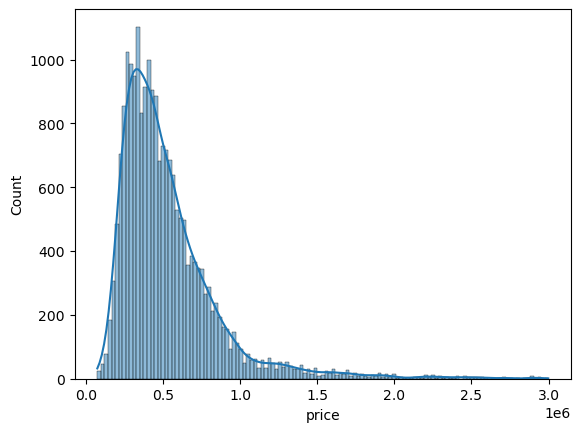

In [7]:
price_less_3e6 = df[df["price"] < 3_000_000]
price_less_3e6["sqft_living"].describe().apply("{0:,.0f}".format)
price_less_3e6["price"].describe().apply("{0:,.0f}".format)


sns.histplot(price_less_3e6["price"], kde=True)

(21238, 20)


count       21,238
mean       519,694
std        287,813
min         75,000
25%        320,000
50%        450,000
75%        635,438
max      2,000,000
Name: price, dtype: object

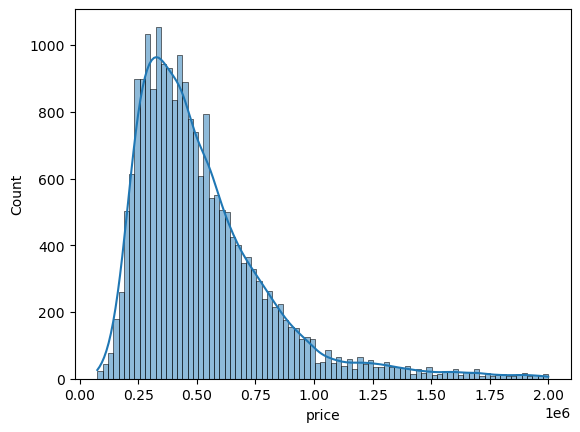

In [8]:
price_equals_less_2e6 = df[df["price"] <= 2_000_000]
price_equals_less_2e6["sqft_living"].describe().apply("{0:,.0f}".format)


sns.histplot(price_equals_less_2e6["price"], kde=True)

print(price_equals_less_2e6.shape)
price_equals_less_2e6["price"].describe().apply("{0:,.0f}".format)



(19979, 20)


count       19,979
mean       467,931
std        196,437
min         75,000
25%        314,950
50%        435,000
75%        594,000
max      1,000,000
Name: price, dtype: object

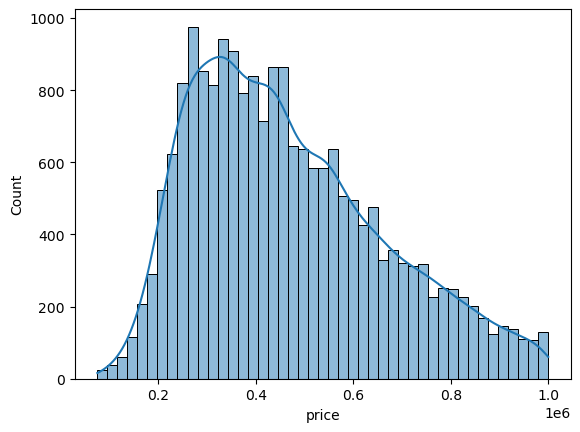

In [9]:
price_equals_less_1e6 = df[df["price"] <= 1_000_000]
price_equals_less_1e6["sqft_living"].describe().apply("{0:,.0f}".format)
# price_equals_less_1e6["price"].describe().apply("{0:,.0f}".format)


sns.histplot(price_equals_less_1e6["price"], kde=True)
print(price_equals_less_1e6.shape)

price_equals_less_1e6["price"].describe().apply("{0:,.0f}".format)


(1457, 20)


count        1,457
mean     1,536,025
std        629,958
min      1,000,750
25%      1,150,000
50%      1,325,000
75%      1,691,000
max      7,700,000
Name: price, dtype: object

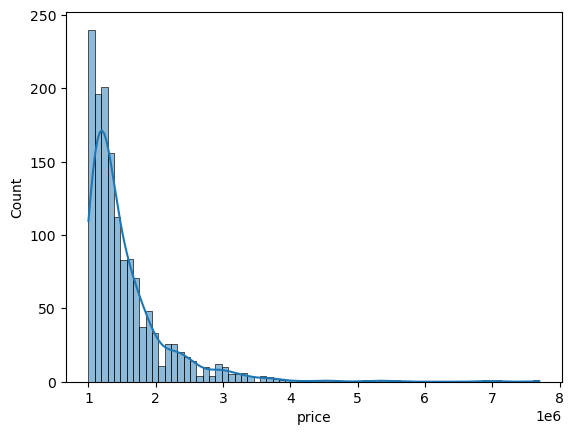

In [10]:
# Subset the dataset for houses priced above 1 million dollars
df_above_1m = df[df['price'] > 1_000_000]


sns.histplot(df_above_1m["price"], kde=True)
print(df_above_1m.shape)

df_above_1m["price"].describe().apply("{0:,.0f}".format)

(12300, 20)


count     12,300
mean     338,517
std       90,983
min       75,000
25%      269,000
50%      340,000
75%      415,000
max      499,990
Name: price, dtype: object

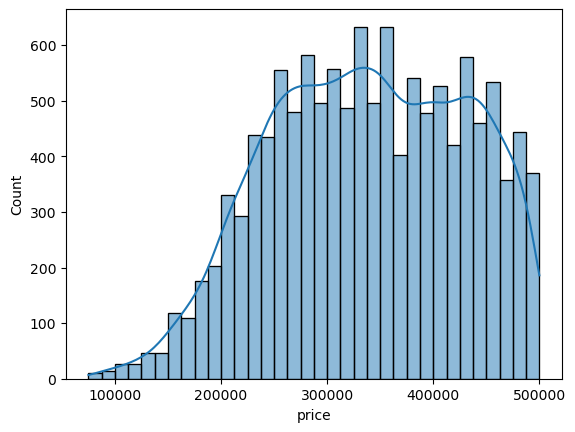

In [11]:
price_less_500K = df[df["price"] < 500_000]

price_less_500K["sqft_living"].describe().apply("{0:,.0f}".format)


sns.histplot(price_less_500K["price"], kde=True)
print(price_less_500K.shape)
price_less_500K["price"].describe().apply("{0:,.0f}".format)

(7679, 20)


count        7,679
mean       675,223
std        131,677
min        500,000
25%        562,500
50%        649,950
75%        765,500
max      1,000,000
Name: price, dtype: object

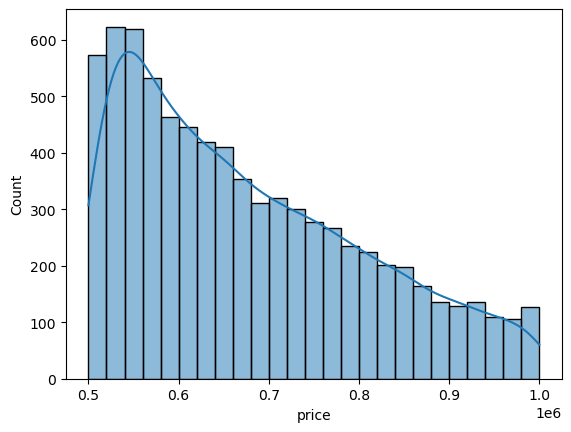

In [12]:
price_btwn_500K_and_1m = df[(df["price"] >= 500_000)  &  (df["price"] <= 1e6)]

price_btwn_500K_and_1m["sqft_living"].describe().apply("{0:,.0f}".format)


sns.histplot(price_btwn_500K_and_1m["price"], kde=True)
print(price_btwn_500K_and_1m.shape)
price_btwn_500K_and_1m["price"].describe().apply("{0:,.0f}".format)

(50, 20)


count           50
mean     3,819,715
std      1,088,118
min      3,000,000
25%      3,176,562
50%      3,397,500
75%      3,837,500
max      7,700,000
Name: price, dtype: object

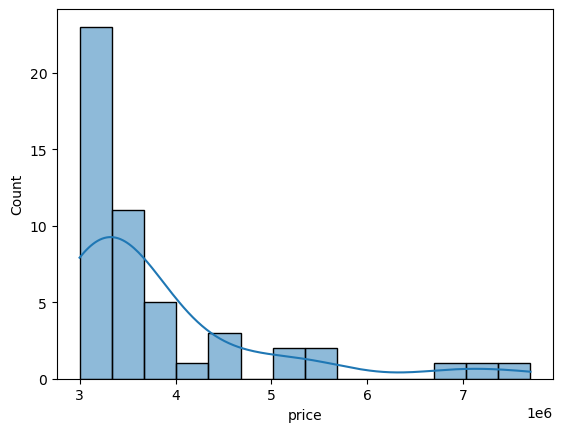

In [13]:
price_over_3e6 = df[df["price"] >= 3_000_000]
price_over_3e6["sqft_living"].describe().apply("{0:,.0f}".format)


sns.histplot(price_over_3e6["price"], kde=True)
print(price_over_3e6.shape)
price_over_3e6["price"].describe().apply("{0:,.0f}".format)


In [14]:
# Converting scientific notation to human-readable figures and discussing the market

# Given numbers
count_times_mean_above_1m = 2237988e9  # Represents count * mean price for houses above 1 million
count_times_mean_below_1m = 9348793e9  # Represents count * mean price for houses below 1 million

# Convert to human-readable numbers
human_readable_above_1m = "{:,.2f}".format(count_times_mean_above_1m)
human_readable_below_1m = "{:,.2f}".format(count_times_mean_below_1m)

(human_readable_above_1m, human_readable_below_1m)

('2,237,988,000,000,000.00', '9,348,793,000,000,000.00')

# eda house prices less than $1 million 

In [15]:
price_equals_less_1e6.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated  zipcode      lat     long  \
0     0          3      7      1955             0    98178  47.5112 -122.257   
1     0          3      7      1951          1991    98125  47.7210 -122.319   
2     0          3      6      1933             0    98028  47.7379 -122.233   
3     0          5      7      1965             0    98136  47.5208 -122.393   
4     0          3      8      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  
0           1340        5650  2014     10   13  
1           1690        7639  2014     12    9  
2           2720        8062  2015      2   25  
3           1360        5000  2014     12    9  
4           1800        7503  2015      2   18

In [16]:
price_equals_less_1e6.shape

(19979, 20)

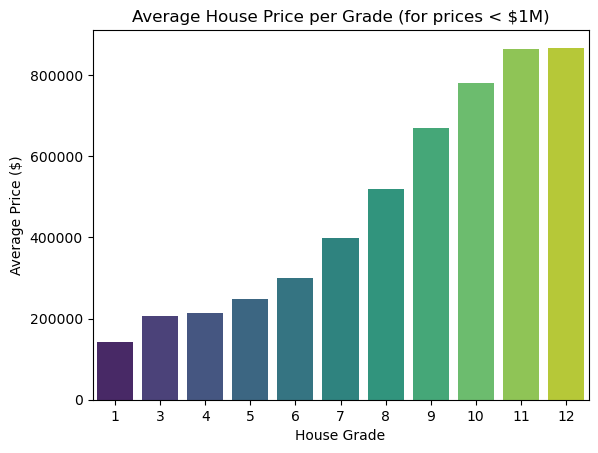

In [17]:
# Group by 'grade' and calculate the mean price, then round it

avg_price_per_grade_less_1e6 = price_equals_less_1e6.groupby("grade")["price"].mean().round()
avg_price_per_grade_less_1e6 = avg_price_per_grade_less_1e6.reset_index()


sns.barplot(
    x="grade",
    y="price",
    data=avg_price_per_grade_less_1e6,
    palette="viridis",
)

# Set the plot title and labels
plt.title('Average House Price per Grade (for prices < $1M)')
plt.xlabel('House Grade')
plt.ylabel('Average Price ($)')
plt.show()

   waterfront     price
0           0  467365.0
1           1  659007.0


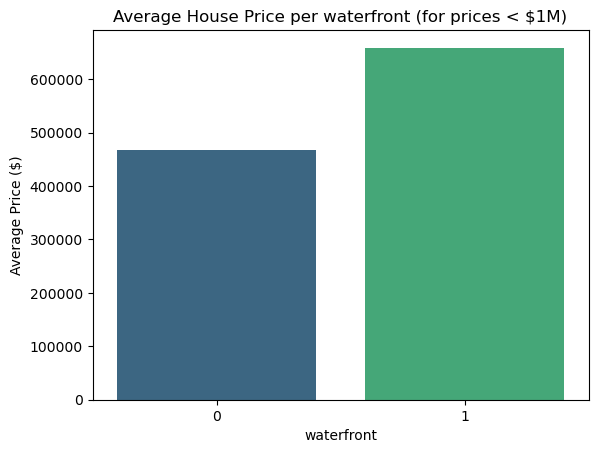

In [18]:
#Group by 'waterfront' and calculate the mean price, then round it

avg_price_per_wf_less_1e6 = price_equals_less_1e6.groupby("waterfront")["price"].mean().round()
avg_price_per_wf_less_1e6 = avg_price_per_wf_less_1e6.reset_index()

print(avg_price_per_wf_less_1e6)
sns.barplot(
    x="waterfront",
    y="price",
    data=avg_price_per_wf_less_1e6,
    palette="viridis"
)

# Set the plot title and labels
plt.title('Average House Price per waterfront (for prices < $1M)')
plt.xlabel('waterfront')
plt.ylabel('Average Price ($)')
plt.show()

   view     price
4     4  728216.0
3     3  623790.0
1     1  605550.0
2     2  602130.0
0     0  455956.0


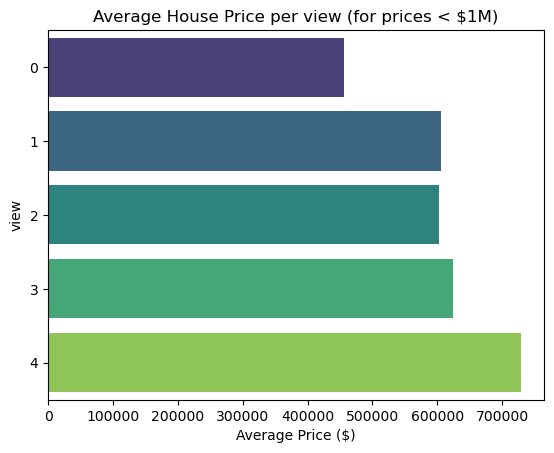

In [19]:
#Group by 'view' and calculate the mean price, then round it

avg_price_per_view_less_1e6 = price_equals_less_1e6.groupby("view")["price"].mean().round()
avg_price_per_view_less_1e6 = avg_price_per_view_less_1e6.reset_index()


# Sort the DataFrame by 'price' in descending order for a better visual distinction in the plot
avg_price_per_view_less_1e6 = avg_price_per_view_less_1e6.sort_values("price", ascending=False)

print(avg_price_per_view_less_1e6)
sns.barplot(
    x="price",
    y="view",
    data=avg_price_per_view_less_1e6,
    palette="viridis", 
    orient="h"
)

# Set the plot title and labels
plt.title('Average House Price per view (for prices < $1M)')
plt.xlabel('Average Price ($)')
plt.ylabel('view')
plt.show()

   condition     price
0          1  288855.0
1          2  305490.0
2          3  470639.0
3          4  457668.0
4          5  501644.0


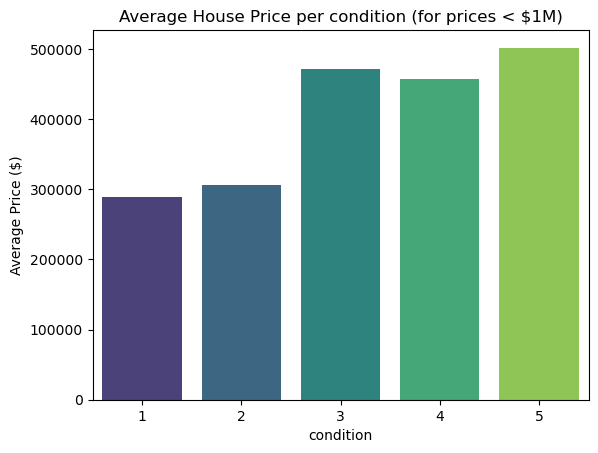

In [20]:
#Group by 'condition' and calculate the mean price, then round it

avg_price_per_condition_less_1e6 = price_equals_less_1e6.groupby("condition")["price"].mean().round()
avg_price_per_condition_less_1e6 = avg_price_per_condition_less_1e6.reset_index()

print(avg_price_per_condition_less_1e6)
sns.barplot(
    x="condition",
    y="price",
    data=avg_price_per_condition_less_1e6,
    palette="viridis"
)

# Set the plot title and labels
plt.title('Average House Price per condition (for prices < $1M)')
plt.xlabel('condition')
plt.ylabel('Average Price ($)')
plt.show()

## zipcode analysis

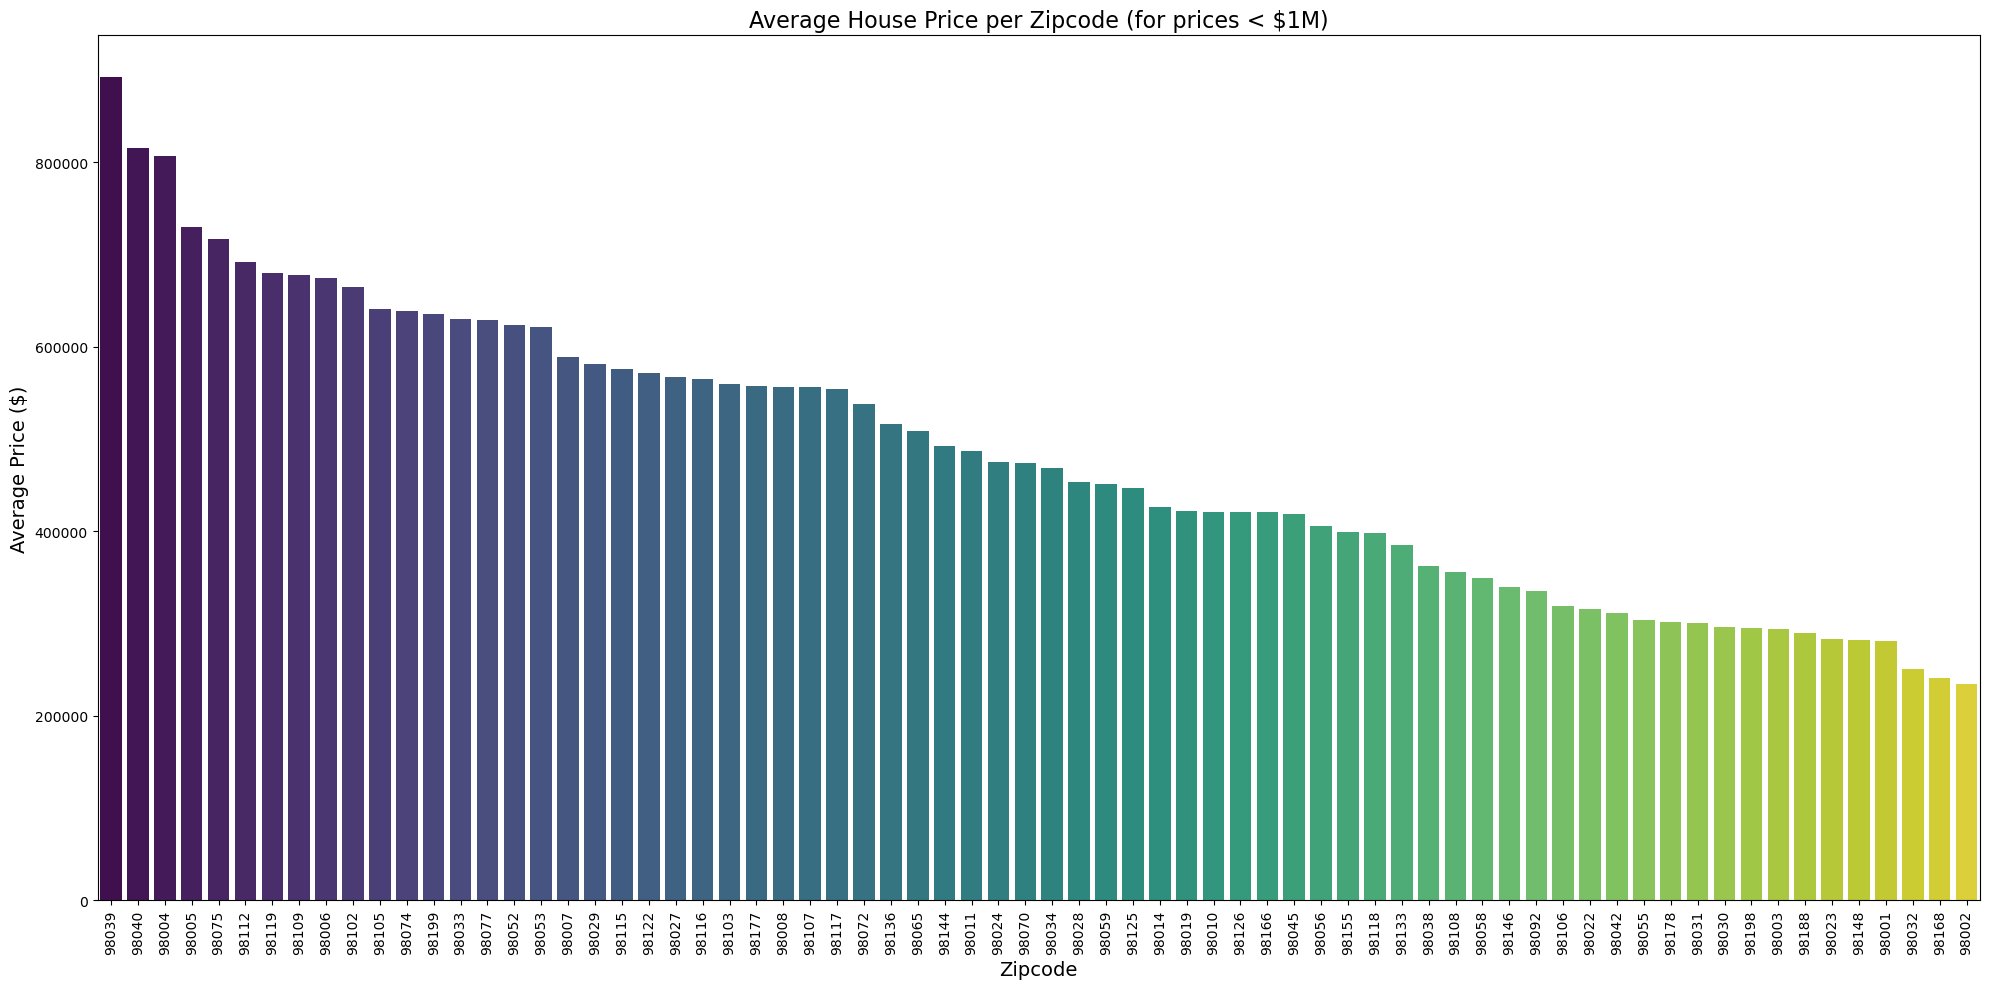

In [21]:
# Group by 'zipcode' and calculate the mean price, then round it

avg_price_per_zipcode_less_1e6 = price_equals_less_1e6.groupby("zipcode")["price"].mean().round()
avg_price_per_zipcode_less_1e6 = avg_price_per_zipcode_less_1e6.reset_index()


# Convert 'zipcode' to string as it's not already but to be included in the wrangle function
avg_price_per_zipcode_less_1e6['zipcode'] = avg_price_per_zipcode_less_1e6['zipcode'].astype(str)
# avg_price_per_zipcode_less_1e6 = avg_price_per_zipcode_less_1e6.sort_values("price", ascending=False)

# Assuming avg_price_per_zipcode_less_1e6 is defined and contains the average prices per zipcode

# Increase the size of the plot
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(
    x='zipcode',
    y='price',
    data=avg_price_per_zipcode_less_1e6.sort_values('price', ascending=False),  # Sort values for better visualization
    palette='viridis'
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Set the plot title and labels with larger font size
plt.title('Average House Price per Zipcode (for prices < $1M)', fontsize=16)
plt.xlabel('Zipcode', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [62]:

avg_price_per_zipcode_less_1e6 = price_equals_less_1e6.groupby("zipcode")["price"].mean().round()
avg_price_per_zipcode_less_1e6 = avg_price_per_zipcode_less_1e6.sort_values(ascending=False).reset_index()

# Calculate average view rating per zipcode
avg_view_per_zipcode = price_equals_less_1e6.groupby("zipcode")["view"].mean().round().astype(int)
# avg_view_per_zipcode.sort_values(ascending=False)


# Calculate average grade per zipcode
avg_grade_per_zipcode = price_equals_less_1e6.groupby("zipcode")["grade"].mean().round().astype(int)
# avg_grade_per_zipcode.sort_values(ascending=False)

# Calculate average condition per zipcode
avg_condition_per_zipcode = price_equals_less_1e6.groupby("zipcode")["condition"].mean().astype(int)
# avg_condition_per_zipcode.sort_values(ascending=False)

# Calculate waterfront presence per zipcode
avg_waterfront_per_zipcode = price_equals_less_1e6.groupby("zipcode")["waterfront"].mean().astype(int)
# avg_waterfront_per_zipcode.sort_values(ascending=False)

# Calculate waterfront presence per zipcode
avg_floor_per_zipcode = price_equals_less_1e6.groupby("zipcode")["floors"].mean().astype(int)
# avg_waterfront_per_zipcode.sort_values(ascending=False)


# Merge these into a single DataFrame
zipcode_analysis = avg_price_per_zipcode_less_1e6.set_index("zipcode").join([
    avg_view_per_zipcode,
    avg_grade_per_zipcode,
    avg_condition_per_zipcode,
    avg_waterfront_per_zipcode,
    avg_floor_per_zipcode

], how="inner")


zipcode_analysis.columns = [
    'Average Price', 
    'Average View', 
    'Average Grade', 
    'Average Condition', 
    'Waterfront Presence',
    'Average Floors'
]

# Display the DataFrame
zipcode_analysis.sort_values('Average Price', ascending=False, inplace=True)
print(zipcode_analysis.shape)

zipcode_analysis






(70, 6)


Average Price  Average View  Average Grade  Average Condition  \
zipcode                                                                  
98039         893000.0             0              7                  3   
98040         815540.0             0              8                  3   
98004         806751.0             0              8                  3   
98005         729715.0             0              8                  3   
98075         717211.0             0              9                  3   
98112         692255.0             0              8                  3   
98119         680459.0             0              8                  3   
98109         677664.0             0              8                  3   
98006         674428.0             0              8                  3   
98102         665299.0             0              8                  3   
98105         641166.0             0              7                  3   
98074         638833.0             0              9                  3   
98199         635440.0             0              8                  3   
98033         629734.0             0              8                  3   
98077         629433.0             0              9                  3   
98052         623170.0             0              8                  3   
98053         621505.0             0              8                  3   
98007         589237.0             0              8                  3   
98029         581118.0             0              8                  3   
98115         575668.0             0              7                  3   
98122         572171.0             0              8                  3   
98027         566841.0             0              8                  3   
98116         565509.0             0              7                  3   
98103         559696.0             0              7                  3   
98177         557066.0             1              8                  3   
98008         556223.0             0              8                  3   
98107         555962.0             0              7                  3   
98117         554300.0             0              7                  3   
98072         537919.0             0              8                  3   
98136         516131.0             1              7                  3   
98065         509231.0             0              8                  3   
98144         492386.0             0              7                  3   
98011         487428.0             0              8                  3   
98024         475586.0             0              7                  3   
98070         473597.0             1              7                  3   
98034         469079.0             0              7                  3   
98028         452999.0             0              8                  3   
98059         450859.0             0              8                  3   
98125         447114.0             0              7                  3   
98014         426129.0             0              7                  3   
98019         421666.0             0              7                  3   
98010         420875.0             0              7                  3   
98126         420803.0             0              7                  3   
98166         420800.0             1              7                  3   
98045         419099.0             0              8                  3   
98056         405944.0             0              7                  3   
98155         398899.0             0              7                  3   
98118         398564.0             0              7                  3   
98133         385523.0             0              7                  3   
98038         362555.0             0              8                  3   
98108         355871.0             0              7                  3   
98058         349728.0             0              8                  3   
98146        

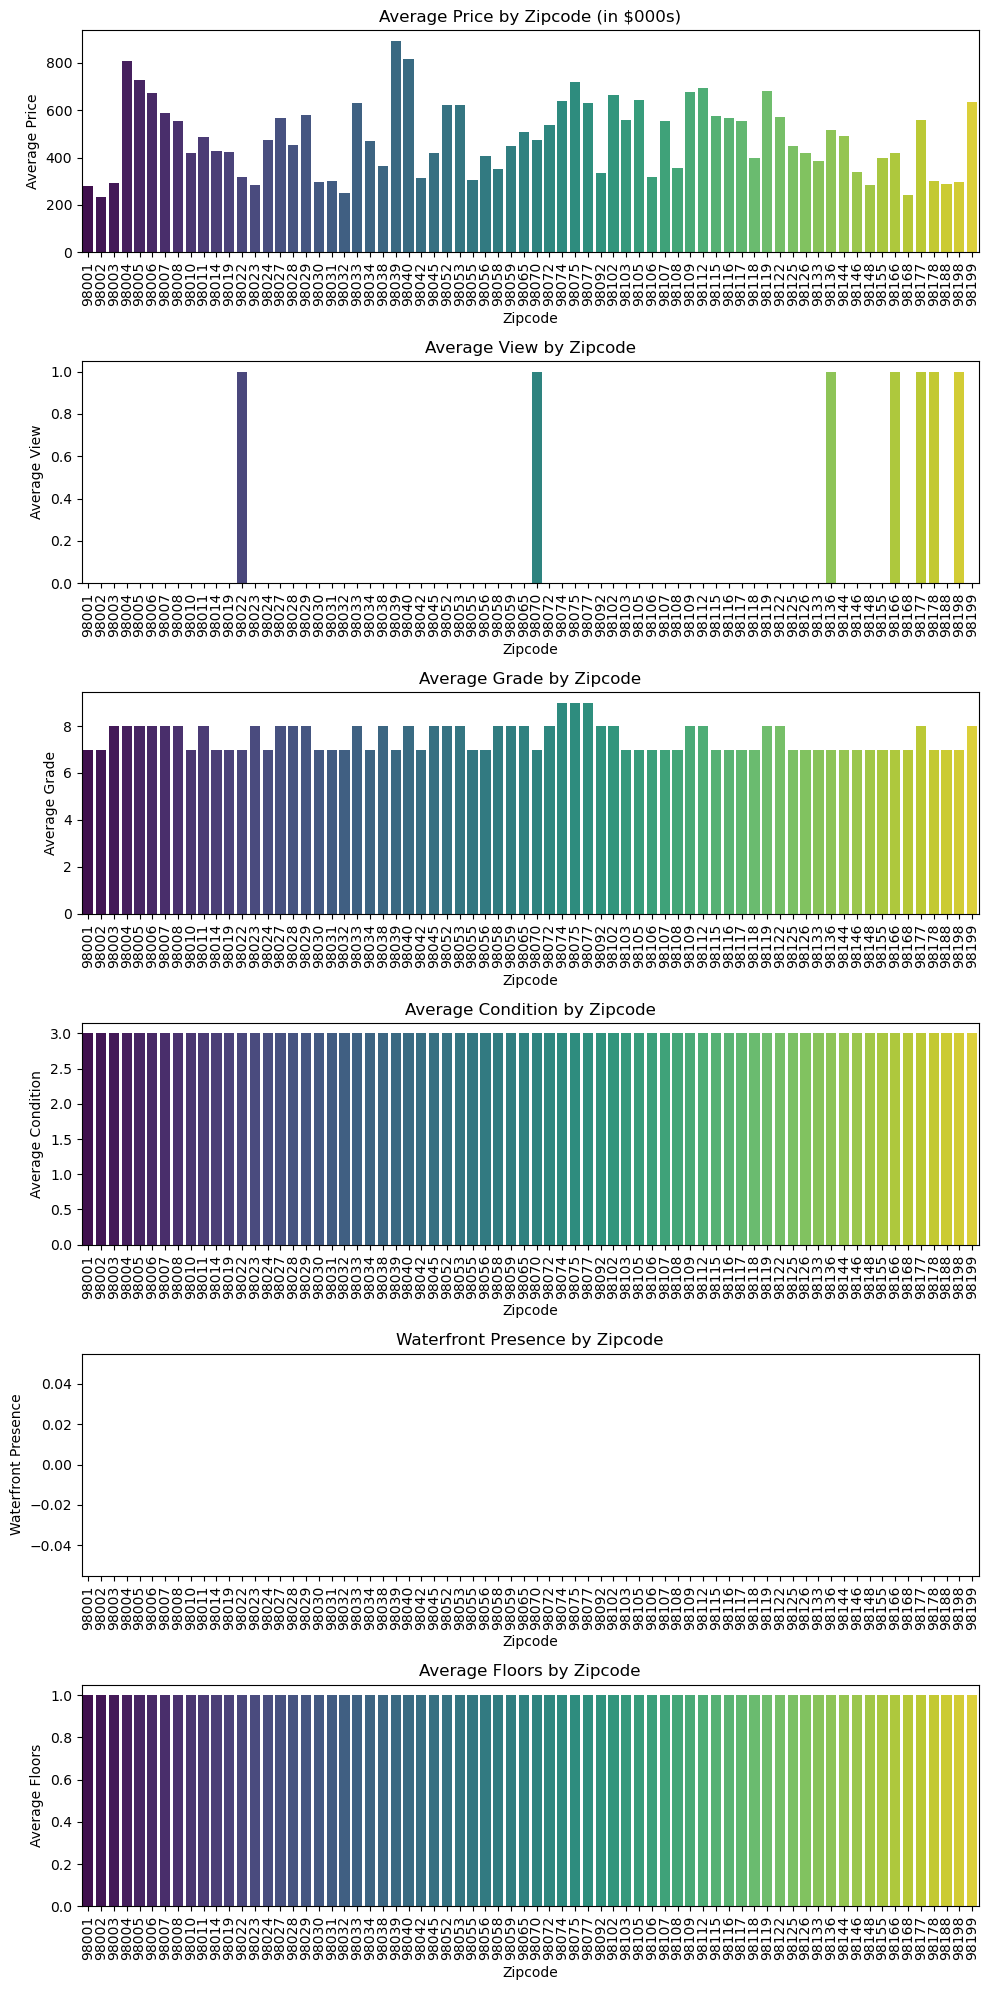

In [63]:
#normalise the price for better visualisation
zipcode_analysis["Average Price"] /= 1000  # in '000s

#creat a fig with subplots
fig, axs = plt.subplots(6,1, figsize=(10,20))

#PLOT avearge price
sns.barplot(x=zipcode_analysis.index, y="Average Price", data=zipcode_analysis, ax=axs[0], palette="viridis")
axs[0].set_title('Average Price by Zipcode (in $000s)')
axs[0].set_xlabel('Zipcode')
axs[0].set_ylabel('Average Price')


# Plot Average View
sns.barplot(x=zipcode_analysis.index, y='Average View', data=zipcode_analysis, ax=axs[1], palette='viridis')
axs[1].set_title('Average View by Zipcode')
axs[1].set_xlabel('Zipcode')
axs[1].set_ylabel('Average View')

# Plot Average Grade
sns.barplot(x=zipcode_analysis.index, y='Average Grade', data=zipcode_analysis, ax=axs[2], palette='viridis')
axs[2].set_title('Average Grade by Zipcode')
axs[2].set_xlabel('Zipcode')
axs[2].set_ylabel('Average Grade')

# Plot Average Condition
sns.barplot(x=zipcode_analysis.index, y='Average Condition', data=zipcode_analysis, ax=axs[3], palette='viridis')
axs[3].set_title('Average Condition by Zipcode')
axs[3].set_xlabel('Zipcode')
axs[3].set_ylabel('Average Condition')

# Plot Waterfront Presence
sns.barplot(x=zipcode_analysis.index, y='Waterfront Presence', data=zipcode_analysis, ax=axs[4], palette='viridis')
axs[4].set_title('Waterfront Presence by Zipcode')
axs[4].set_xlabel('Zipcode')
axs[4].set_ylabel('Waterfront Presence')


# Plot  Average Floors 
sns.barplot(x=zipcode_analysis.index, y='Average Floors', data=zipcode_analysis, ax=axs[5], palette='viridis')
axs[5].set_title('Average Floors by Zipcode')
axs[5].set_xlabel('Zipcode')
axs[5].set_ylabel('Average Floors')

#rotate the x-axis labels:
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)


# Automatically adjust the subplot layout for a clean look
plt.tight_layout()

# Display the plots
plt.show()


In [23]:
price_equals_less_1e6_with_wf = price_equals_less_1e6[price_equals_less_1e6["waterfront"] == 1]

In [24]:
price_equals_less_1e6_with_wf.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
230   655000.0         2       1.75         1450     15798     2.0   
264   369900.0         1       0.75          760     10079     1.0   
457   705000.0         3       3.00         1970     20978     2.0   
1081  825000.0         2       1.00         1150     12775     1.0   
1157  790000.0         4       1.75         2460     10061     1.0   

      waterfront  view  condition  grade  yr_built  yr_renovated  zipcode  \
230            1     4          3      7      1915          1978    98166   
264            1     4          5      5      1936             0    98070   
457            1     3          4      9      1980             0    98070   
1081           1     4          4      6      1908             0    98178   
1157           1     4          3      7      1961             0    98178   

          lat     long  sqft_living15  sqft_lot15  year  month  day  
230   47.4497 -122.375           2030       13193  2015      4   13  
264   47.4683 -122.438           1230       14267  2014     10   27  
457   47.3844 -122.438           2280       75396  2014     11   26  
1081  47.5020 -122.222           2440       11852  2014      8   27  
1157  47.5105 -122.238           2300       10061  2014     12   29

In [25]:
price_equals_less_1e6_with_wf.describe()

price   bedrooms  bathrooms  sqft_living       sqft_lot  \
count       59.000000  59.000000  59.000000     59.00000      59.000000   
mean    659007.491525   2.813559   1.961864   1989.20339   33659.169492   
std     205554.327899   1.041792   0.892755    794.42744   67856.669032   
min     285000.000000   1.000000   0.750000    440.00000    1989.000000   
25%     511500.000000   2.000000   1.000000   1455.00000   11390.000000   
50%     650000.000000   3.000000   1.750000   1990.00000   17635.000000   
75%     810000.000000   3.000000   2.500000   2520.00000   27962.500000   
max    1000000.000000   6.000000   4.500000   4380.00000  505166.000000   

          floors  waterfront       view  condition      grade     yr_built  \
count  59.000000        59.0  59.000000  59.000000  59.000000    59.000000   
mean    1.423729         1.0   3.627119   3.593220   7.254237  1948.983051   
std     0.498390         0.0   0.692280   0.768309   1.138560    24.219892   
min     1.000000         1.0   1.000000   1.000000   5.000000  1903.000000   
25%     1.000000         1.0   3.000000   3.000000   6.500000  1930.000000   
50%     1.000000         1.0   4.000000   4.000000   7.000000  1950.000000   
75%     2.000000         1.0   4.000000   4.000000   8.000000  1965.000000   
max     3.000000         1.0   4.000000   5.000000  10.000000  2007.000000   

       yr_renovated       zipcode        lat        long  sqft_living15  \
count     59.000000     59.000000  59.000000   59.000000      59.000000   
mean     471.288136  98121.474576  47.435134 -122.374729    1955.627119   
std      852.217757     58.505336   0.069751    0.094117     576.894716   
min        0.000000  98006.000000  47.327600 -122.514000     750.000000   
25%        0.000000  98070.000000  47.379050 -122.445500    1605.000000   
50%        0.000000  98136.000000  47.449900 -122.377000    1970.000000   
75%        0.000000  98178.000000  47.498250 -122.324500    2345.000000   
max     2003.000000  98198.000000  47.645000 -122.084000    3270.000000   

          sqft_lot15         year      month        day  
count      59.000000    59.000000  59.000000  59.000000  
mean    28266.288136  2014.254237   6.949153  19.067797  
std     31486.952867     0.439169   3.245282   7.910849  
min      2433.000000  2014.000000   1.000000   1.000000  
25%     11897.000000  2014.000000   4.500000  13.000000  
50%     16630.000000  2014.000000   7.000000  20.000000  
75%     32193.500000  2014.500000  10.000000  27.000000  
max    192268.000000  2015.000000  12.000000  30.000000

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='waterfront', ylabel='Count'>

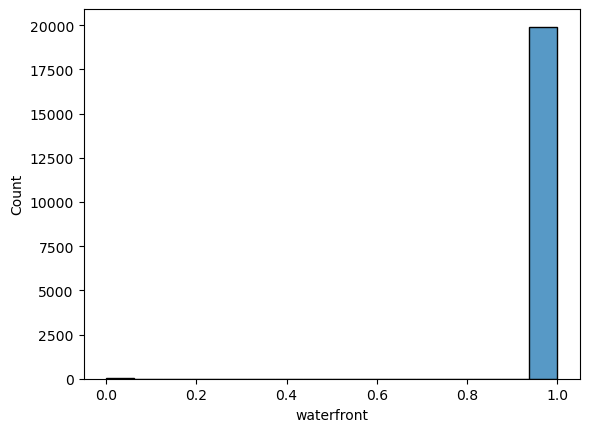

In [67]:
sns.histplot(price_equals_less_1e6["waterfront"]== 0)

In [77]:
price_equals_less_1e6.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated  zipcode      lat     long  \
0     0          3      7      1955             0    98178  47.5112 -122.257   
1     0          3      7      1951          1991    98125  47.7210 -122.319   
2     0          3      6      1933             0    98028  47.7379 -122.233   
3     0          5      7      1965             0    98136  47.5208 -122.393   
4     0          3      8      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  
0           1340        5650  2014     10   13  
1           1690        7639  2014     12    9  
2           2720        8062  2015      2   25  
3           1360        5000  2014     12    9  
4           1800        7503  2015      2   18

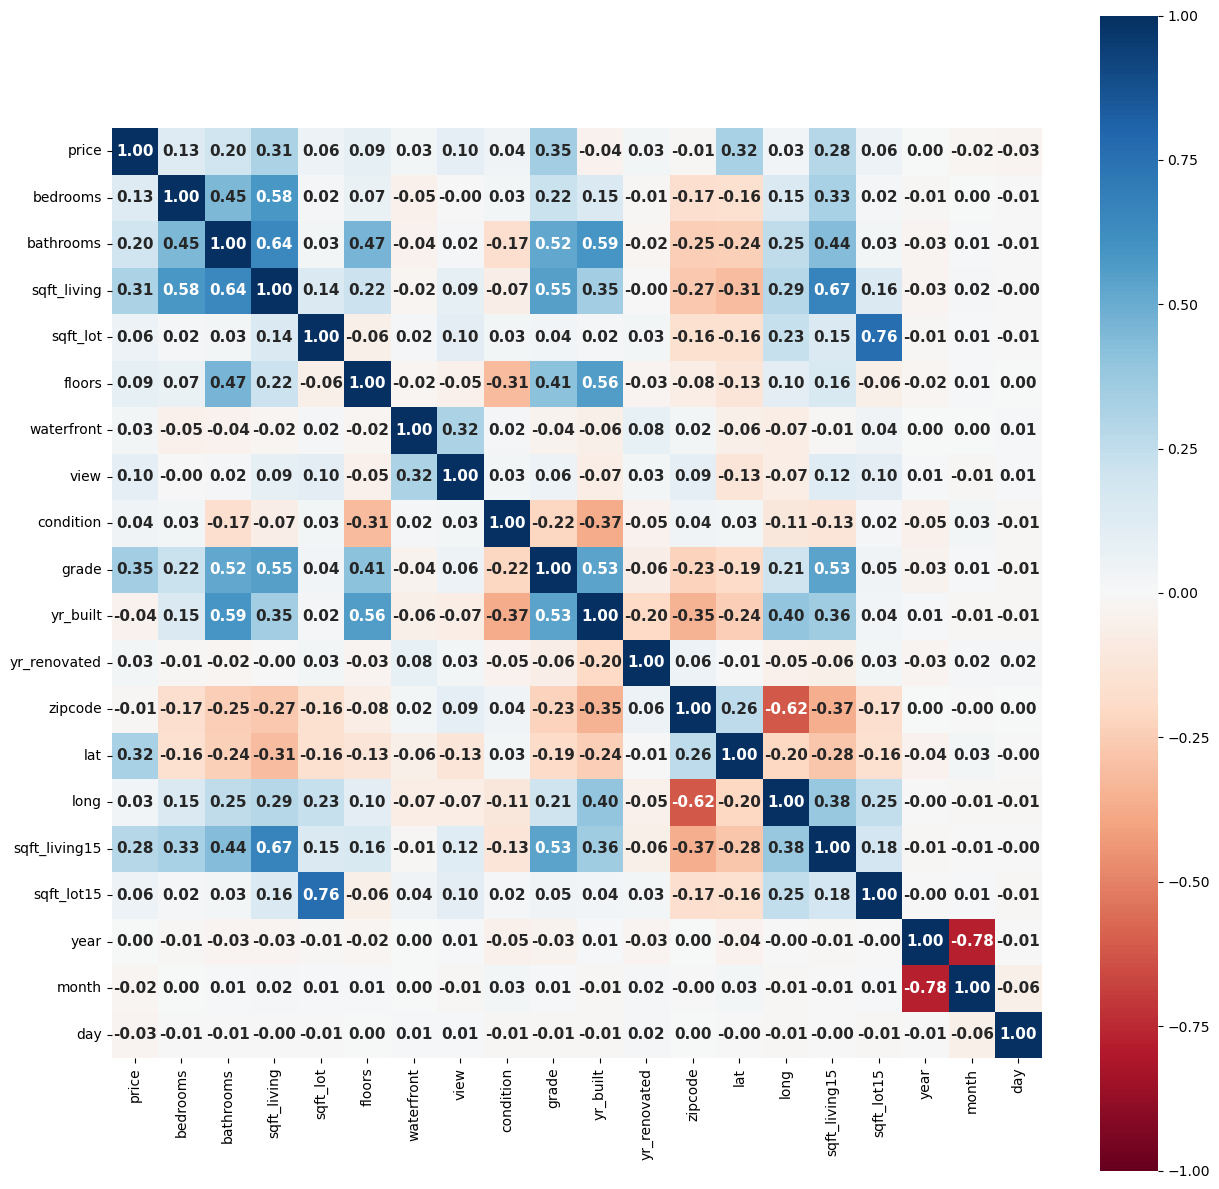

In [113]:
fig, ax = plt.subplots(figsize=(15,15))   

sns.heatmap(price_equals_less_1e6.corr(), cmap="RdBu", fmt=".2f", square=True,  
            annot=True, vmin=-1, vmax=1, ax=ax, annot_kws={"fontsize": 11, "fontweight": "bold"})
plt.show()

In [95]:
price_equals_less_1e6.describe()[["sqft_living", "sqft_living15"]]

sqft_living  sqft_living15
count  12880.000000   12880.000000
mean    1903.013820    1868.257919
std      643.088106     504.295944
min      410.000000     399.000000
25%     1430.000000    1480.000000
50%     1840.000000    1800.000000
75%     2300.000000    2200.000000
max     5461.000000    4362.000000

<Axes: xlabel='sqft_living', ylabel='Count'>

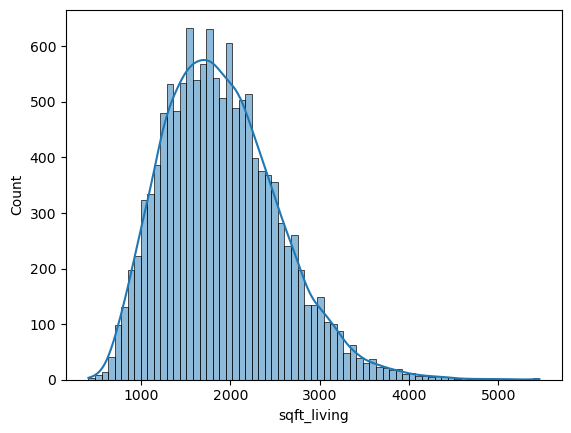

In [120]:
sns.histplot(price_equals_less_1e6["sqft_living"], kde=True)

Text(0.5, 1.0, 'price vs area')

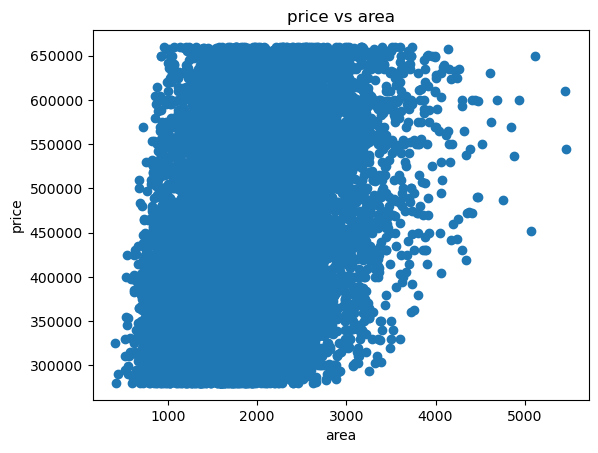

In [134]:
plt.scatter(x=price_equals_less_1e6["sqft_living"], y=price_equals_less_1e6["price"])
plt.xlabel("area")
plt.ylabel("price")
plt.title("price vs area")

In [138]:
features = ["sqft_living"]
X_train = price_equals_less_1e6[features]
target = "price"
y_train = price_equals_less_1e6[target]
y_train.shape

(12880,)

# Build Model
## Baseline
The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

In [139]:
y_mean = y_train.mean()
y_mean

444697.3083850932

In [152]:
y_predict_baseline = [y_mean] * len(y_train)
len(y_predict_baseline)

12880

In [163]:
len(X_train)

12880

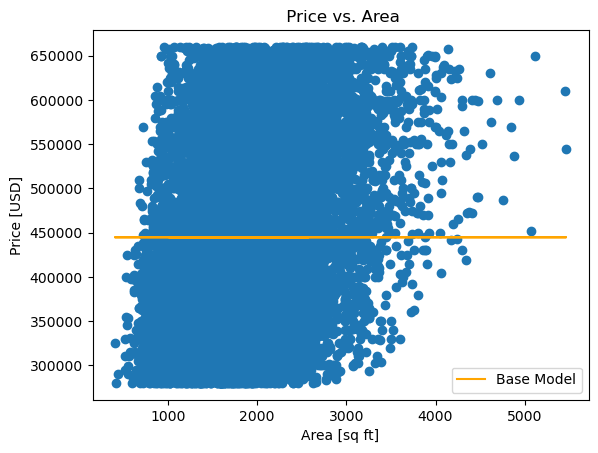

In [165]:
plt.plot(X_train, y_predict_baseline, color="orange", label="Base Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq ft]")
plt.ylabel("Price [USD]")
plt.title(" Price vs. Area")
plt.legend()

In [168]:
mae_baseline = mean_absolute_error(y_train, y_predict_baseline)

print("Mean apt price: ", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price:  444697.31
Baseline MAE: 89864.97


What does this information tell us? If we always predicted that an apartment price is  $444,697.31, our predictions would be off by an average of $89,864.97. It also tells us that our model needs to have mean absolute error below $89,864.97 in order to be useful. 

## Iterate

In [171]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

## Evaluate

In [172]:
y_pred_training = lin_model.predict(X_train)
y_pred_training[:5]

array([478949.7046147 , 447623.77564842, 433244.66071308, 401405.19192769,
       444028.99691459])

In [174]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 84494.44


In [181]:
intercept = lin_model.intercept_
print("Model Intercept:", intercept)

coefficient = lin_model.coef_[0]
print('Model coefficient for "surface_covered_in_feet":', round(coefficient,2))

Model Intercept: 346969.97110104334
Model coefficient for "surface_covered_in_feet": 51.35


In [185]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered > ( y = b + mx)")

apt_price = 346969.97110104334 + 51.35398191192811 * surface_covered > ( y = b + mx)


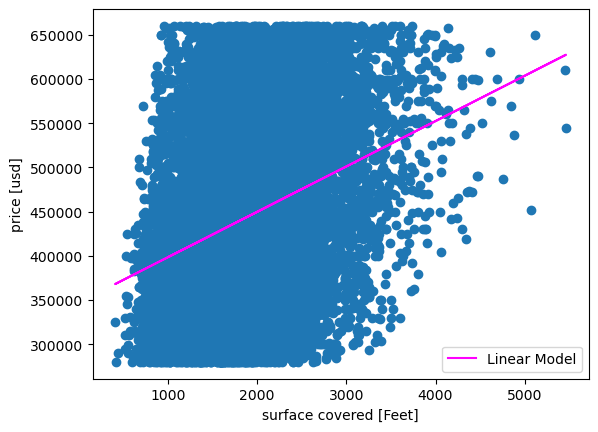

In [190]:
plt.plot(X_train, lin_model.predict(X_train), color="magenta", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [Feet]")
plt.ylabel("price [usd]")
plt.legend()

In [195]:
price_equals_less_1e6.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month', 'day'],
      dtype='object')

In [212]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="long",
    width=600,  # Width of map
    height=600,  # Height of map
    color="price",
    hover_data=["price", "bedrooms", "sqft_living", 'waterfront', 'grade'],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [211]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lat",
    y="long",
    z="price",
    labels={"long": "longitude", "lat": "latitude", "price": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

<Axes: xlabel='price', ylabel='Count'>

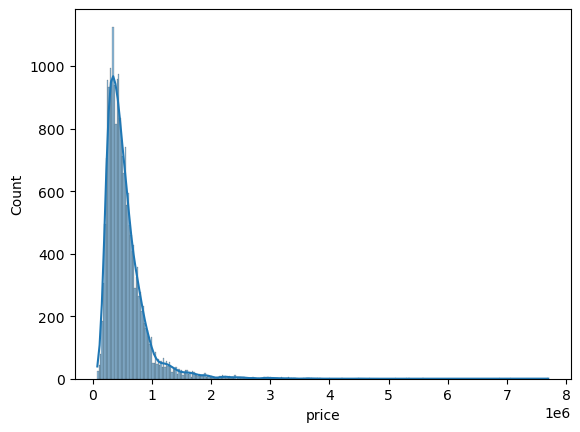

In [214]:
sns.histplot(df["price"], kde=True)

In [10]:
df['log_price'] = np.log(df['price'])
# price_equals_less_1e6['log_price'] = np.log(price_equals_less_1e6['price'])



<Axes: xlabel='log_price', ylabel='Count'>

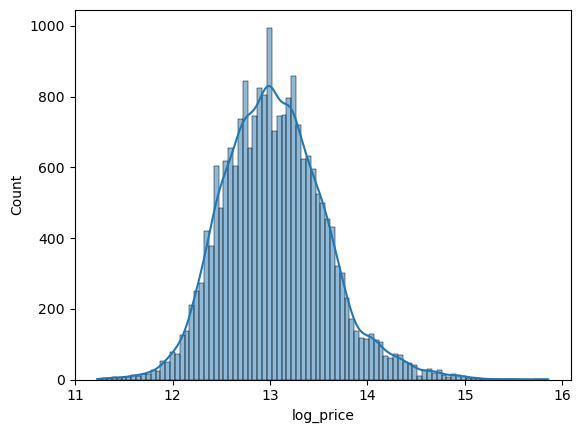

In [11]:
from scipy.stats import norm

sns.histplot(df["log_price"], kde=True)

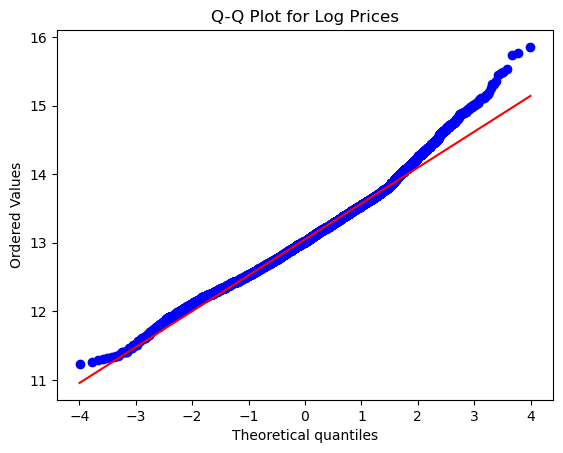

In [12]:
import scipy.stats as stats

# Generate a Q-Q plot
stats.probplot(df["log_price"], dist="norm", plot=plt)

# Add title
plt.title('Q-Q Plot for Log Prices')

# Display the plot
plt.show()

In [13]:
from scipy import stats

# Assuming `log_price` is a pandas Series containing the log-transformed prices
statistic, p_value = stats.shapiro(df["log_price"])

print(f'Statistic: {statistic}, p-value: {p_value}')

# Typically, if the p-value is less than 0.05, we reject the null hypothesis, 
# indicating that the data are not normally distributed.
if p_value > 0.05:
    print('The log_price distribution appears to be normal (fail to reject H0)')
else:
    print('The log_price distribution does not appear to be normal (reject H0)')


Statistic: 0.9892165064811707, p-value: 8.422306892792782e-37
The log_price distribution does not appear to be normal (reject H0)


c:\Users\eakli\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
# Skewness and Kurtosis
skewness = df["log_price"].skew()
kurtosis = df["log_price"].kurt()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: 0.4280784583487754
Kurtosis: 0.6951580417159797


Text(0.5, 1.0, 'price vs area')

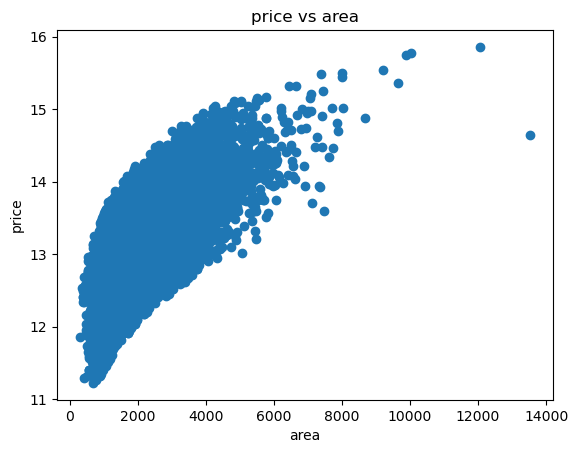

In [15]:
plt.scatter(x=df["sqft_living"], y=df["log_price"])
plt.xlabel("area")
plt.ylabel("price")
plt.title("price vs area")

In [16]:
features = ["long", "lat"]
X_train = df[features]
X_train.shape

(21436, 2)

In [17]:
target = "log_price"
y_train = df[target]
y_train.shape

(21436,)

## Baseline with log_transformed price

In [18]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[13.048517176110403,
 13.048517176110403,
 13.048517176110403,
 13.048517176110403,
 13.048517176110403]

In [19]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

# Evaluate the model
mse = mean_squared_error(y_train, y_pred_baseline)
rmse = np.sqrt(mse)
print(f"Baseline RMSE: {rmse}")

Mean apt price 13.05
Baseline MAE: 0.41
Baseline RMSE: 0.5268452849599292


In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_training_log = model.predict(X_train)

In [23]:
mae_training = mean_absolute_error(y_train, y_pred_training_log)
print("Training MAE:", round(mae_training, 2))

mse = mean_squared_error(y_train, y_pred_training_log)
rmse = np.sqrt(mse)
print(f"Trianing RMSE:",  round(rmse, 2))

Training MAE: 0.36
Trianing RMSE: 0.47


In [24]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="long",
    y="lat",
    z="log_price",
    labels={"long": "longitude", "lat": "latitude", "log_price": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["long"].min(), df["long"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"long": x_plane, "lat": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   long    21436 non-null  float64
 1   lat     21436 non-null  float64
dtypes: float64(2)
memory usage: 502.4 KB


In [26]:
# Calculate the full range of prices
# min_price = df['price'].min()
# max_price = df['price'].max()

# # Create the scatter map
# fig = px.scatter_mapbox(
#     df,  # Our DataFrame
#     lat="lat",
#     lon="long",
#     width=600,  # Width of map
#     height=600,  # Height of map
#     color="price",
#     color_continuous_scale=px.colors.sequential.Viridis,  # Optional: Choose a color scale
#     range_color=(min_price, max_price),  # Set the range of colors to match min and max prices
#     hover_data=["price"],  # Display price when hovering mouse over house
# )

# fig.update_layout(mapbox_style="open-street-map")

# fig.show()

## Price and Zipcode

In [32]:
target = "log_price"
features = ["zipcode"]
y_train = df[target]
X_train = df[features]

In [33]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean )

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

mse = mean_squared_error(y_train, y_pred_baseline)
rmse = np.sqrt(mse)
print(f"Baseline RMSE: {rmse}")

Mean apt price: 13.048517176110403
Baseline MAE: 0.413787372486445
Baseline RMSE: 0.5268452849599292


## Build Model and Baseline based on Zipcode

In [34]:
X_train.head()

zipcode
0   98178
1   98125
2   98028
3   98136
4   98074

In [35]:
ohe = OneHotEncoder(use_cat_names=True)
XT_train = ohe.fit_transform(X_train)
print(XT_train.shape)
XT_train.head()

(21436, 70)


zipcode_98178.0  zipcode_98125.0  zipcode_98028.0  zipcode_98136.0  \
0                1                0                0                0   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                0                0   

   zipcode_98074.0  zipcode_98053.0  zipcode_98003.0  zipcode_98198.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   zipcode_98146.0  zipcode_98038.0  zipcode_98007.0  zipcode_98115.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98107.0  zipcode_98126.0  zipcode_98019.0  zipcode_98103.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98002.0  zipcode_98133.0  zipcode_98040.0  zipcode_98092.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98030.0  zipcode_98119.0  zipcode_98112.0  zipcode_98052.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98027.0  zipcode_98117.0  zipcode_98058.0  zipcode_98001.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98056.0  zipcode_98166.0  zipcode_98023.0  zipcode_98070.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98148.0  zipcode_98105.0  zipcode_98042.0  zipcode_98008.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   zipcode_98059.0  zipcode_98122.0  zipcode_98144.0

In [39]:
## Build Model  on Zipcode
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['zipcode'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [41]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

mse = mean_squared_error(y_train, y_pred_baseline)
rmse = np.sqrt(mse)
print(f"Training RMSE: {rmse}")

Training MAE: 0.27
Training RMSE: 0.5268452849599292


In [42]:
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 70
[3.33140166e+11 3.33140166e+11 3.33140166e+11 3.33140166e+11
 3.33140166e+11]


In [43]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 70
['zipcode_98178.0' 'zipcode_98125.0' 'zipcode_98028.0' 'zipcode_98136.0'
 'zipcode_98074.0']


In [44]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

zipcode_98178.0    3.331402e+11
zipcode_98125.0    3.331402e+11
zipcode_98028.0    3.331402e+11
zipcode_98136.0    3.331402e+11
zipcode_98074.0    3.331402e+11
dtype: float64

In [45]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = -333140165807.27
+ (333140165819.83 * zipcode_98178.0)
+ (333140165820.27 * zipcode_98125.0)
+ (333140165820.27 * zipcode_98028.0)
+ (333140165820.42 * zipcode_98136.0)
+ (333140165820.66 * zipcode_98074.0)
+ (333140165820.62 * zipcode_98053.0)
+ (333140165819.81 * zipcode_98003.0)
+ (333140165819.81 * zipcode_98198.0)
+ (333140165819.94 * zipcode_98146.0)
+ (333140165820.02 * zipcode_98038.0)
+ (333140165820.56 * zipcode_98007.0)
+ (333140165820.55 * zipcode_98115.0)
+ (333140165820.5 * zipcode_98107.0)
+ (333140165820.17 * zipcode_98126.0)
+ (333140165820.19 * zipcode_98019.0)
+ (333140165820.49 * zipcode_98103.0)
+ (333140165819.61 * zipcode_98002.0)
+ (333140165820.1 * zipcode_98133.0)
+ (333140165821.18 * zipcode_98040.0)
+ (333140165819.94 * zipcode_98092.0)
+ (333140165819.84 * zipcode_98030.0)
+ (333140165820.83 * zipcode_98119.0)
+ (333140165821.05 * zipcode_98112.0)
+ (333140165820.61 * zipcode_98052.0)
+ (333140165820.52 * zipcode_98027.0)
+ (333140165820.48 * zipcod

In [47]:
## Build ridge Model  on Zipcode
ridge_model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['zipcode'], use_cat_names=True)),
                ('ridge', Ridge())])

In [48]:
y_pred_training = ridge_model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

mse = mean_squared_error(y_train, y_pred_baseline)
rmse = np.sqrt(mse)
print(f"Training RMSE: {rmse}")

Training MAE: 0.27
Training RMSE: 0.5268452849599292


In [49]:
intercept = ridge_model.named_steps["ridge"].intercept_
coefficients = ridge_model.named_steps["ridge"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 70
[-0.49529596 -0.06038624 -0.05773883  0.09017605  0.32621205]


In [50]:
feature_names = ridge_model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 70
['zipcode_98178.0' 'zipcode_98125.0' 'zipcode_98028.0' 'zipcode_98136.0'
 'zipcode_98074.0']


In [51]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

zipcode_98178.0   -0.495296
zipcode_98125.0   -0.060386
zipcode_98028.0   -0.057739
zipcode_98136.0    0.090176
zipcode_98074.0    0.326212
dtype: float64

Text(0.5, 1.0, 'Feature Importance for apartment price')

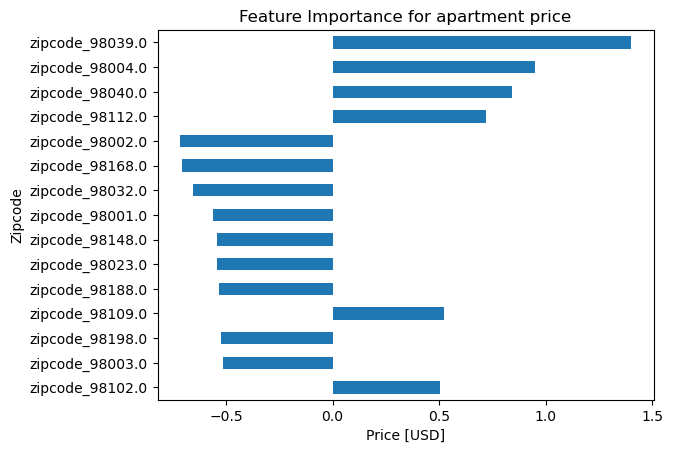

In [54]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Price [USD]")
plt.ylabel("Zipcode")
plt.title("Feature Importance for apartment price")

In [4]:
# Calculate IQR for "price"
price_Q1 = price_equals_less_1e6["price"].quantile(0.25)
price_Q3 = price_equals_less_1e6["price"].quantile(0.75)
price_IQR = price_Q3 - price_Q1
lower_bound = price_Q1 - (1.5 * price_IQR)
upper_bound = price_Q3 + (1.5 * price_IQR)

# Print the bounds to check them
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Find outliers
outliers_df = price_equals_less_1e6[(price_equals_less_1e6["price"] < lower_bound) | (price_equals_less_1e6["price"] > upper_bound)]

# Check if outliers_df is empty
if outliers_df.empty:
    print("No outliers based on the given criteria.")
else:
    # Describe the price column in outliers_df
    print(outliers_df["price"].describe().apply(lambda x: "{0:,.0f}".format(x)))


NameError: name 'price_equals_less_1e6' is not defined

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

<center>"Equation: y = m*x + b"</center>

Since data scientists often work with more complicated linear models, they prefer to write the equation as:

<center> "Equation: y = beta 0 + beta 1 * x" </center>

Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept.

In [ ]:
# Calculate IQR for "price"
price_Q1 = df["price"].quantile(0.25)
price_Q3 = df["price"].quantile(0.75)
price_IQR = price_Q3 - price_Q1
lower_bound = price_Q1 - (1.5 * price_IQR)
upper_bound = price_Q3 + (1.5 * price_IQR)

# Print the bounds to check them
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Find outliers
outliers_df = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

# Check if outliers_df is empty
if outliers_df.empty:
    print("No outliers based on the given criteria.")
else:
    # Describe the price column in outliers_df
    print(outliers_df["price"].describe().apply(lambda x: "{0:,.0f}".format(x)))


Lower Bound: 147500.0
Upper Bound: 775500.0
No outliers based on the given criteria.


In [ ]:
#remove outliers by surface area covered
low, high = price_equals_less_1e6["price"].quantile([0.1, 0.9])
mask_area = price_equals_less_1e6["price"].between(low, high)
price_equals_less_1e6 = price_equals_less_1e6[mask_area]
price_equals_less_1e6["price"].describe().apply("{0:,.0f}".format)

count     10,421
mean     440,795
std       82,892
min      310,000
25%      369,900
50%      435,000
75%      510,000
max      600,000
Name: price, dtype: object

In [ ]:
# Handling outliers for 'price' - here we are just checking for extreme values
price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1
lower_bound = price_Q1 - (1.5 * price_IQR)
upper_bound = price_Q3 + (1.5 * price_IQR)
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Dropping the extreme outliers for 'price'
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Checking the new shape of the dataset after cleaning
new_shape = df.shape

In [ ]:
# # Convert 'zipcode' to a string format
# df['zipcode'] = df['zipcode'].astype(str)

In [ ]:
zipcode_avg_price = df.groupby('zipcode')['price'].mean()#.sort_values(ascending=False)


In [ ]:
# Prepare the data for feature enginnering
geo_data = df[['zipcode', 'lat', 'long']].drop_duplicates()
geo_data['avg_price'] = geo_data['zipcode'].map(zipcode_avg_price)

# Scale the features
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data[['lat', 'long', 'avg_price']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
geo_data['cluster'] = kmeans.fit_predict(geo_data_scaled)

# Create a mapping from zipcode to cluster
zipcode_to_cluster = geo_data.set_index('zipcode')['cluster'].to_dict()

# Map the geographic groupings back to the original properties
df['geo_group'] = df['zipcode'].map(zipcode_to_cluster)


In [ ]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated  zipcode      lat     long  \
0     0          3      7      1955             0    98178  47.5112 -122.257   
1     0          3      7      1951          1991    98125  47.7210 -122.319   
2     0          3      6      1933             0    98028  47.7379 -122.233   
3     0          5      7      1965             0    98136  47.5208 -122.393   
4     0          3      8      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  geo_group  
0           1340        5650  2014     10   13          3  
1           1690        7639  2014     12    9          2  
2           2720        8062  2015      2   25          2  
3           1360        5000  2014     12    9          2  
4           1800        7503  2015      2   18          1

In [ ]:
# Assuming df is your DataFrame and 'bathrooms' is the column of interest
df['full_bathrooms'] = df['bathrooms'].apply(lambda x: int(x))  # Full bathrooms are the integer part
df['half_bathrooms'] = df['bathrooms'].apply(lambda x: (x - int(x)) * 2)  # Half bathrooms are the fractional part, multiplied by 2

# Create a feature for unusual bathroom counts
df['unusual_bath_count'] = df['bathrooms'].isin([0, 0.75]).astype(int)

# Investigate properties with 0 bathrooms
properties_with_no_bathrooms = df[df['bathrooms'] == 0]

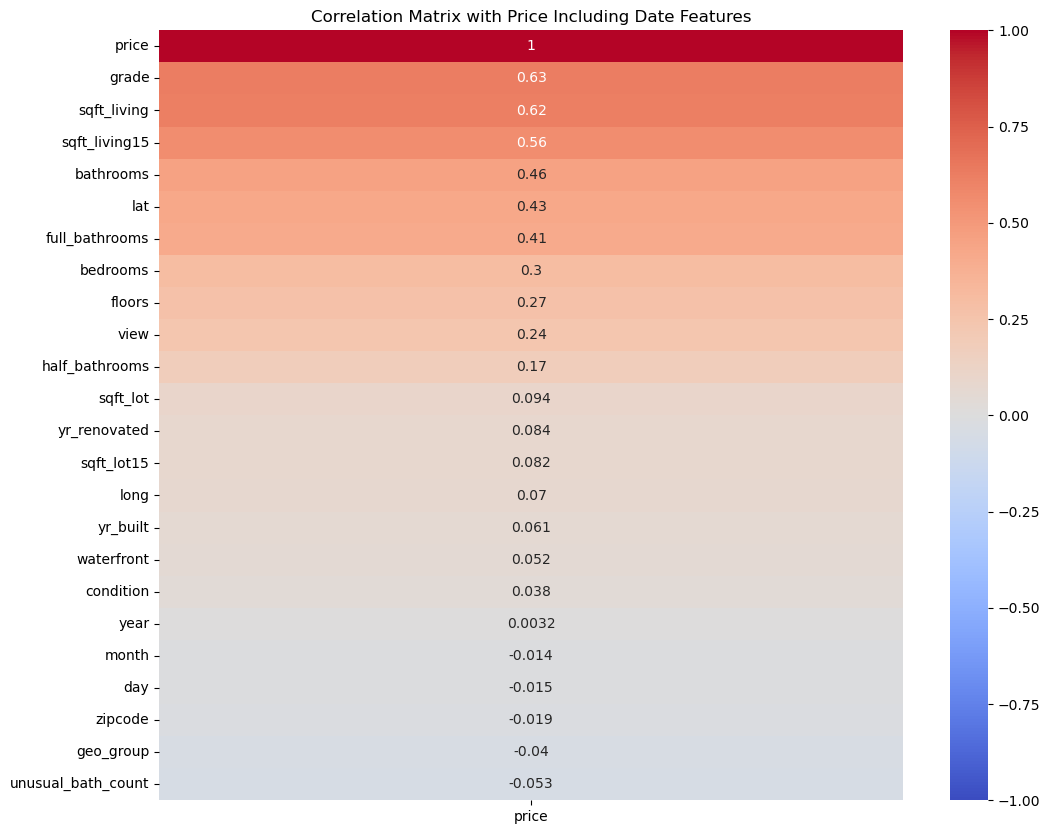

In [ ]:
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Including Date Features')
plt.show()

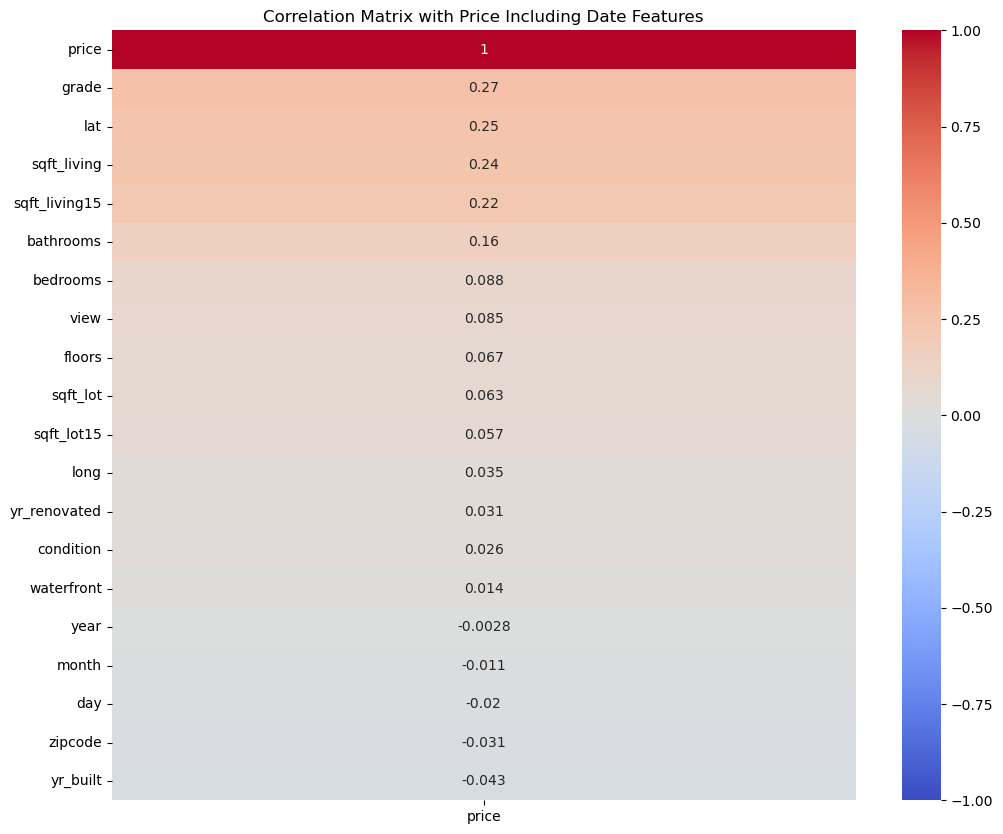

In [ ]:
corr_matrix = price_equals_less_1e6.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Including Date Features')
plt.show()